# PythonとKerasによるディープラーニング 第5章 CNN 演習

データセット: CIFAR-10  
説明: 物体のフルカラー画像のデータセット。10カテゴリーに分かれている。  
0. 飛行機(airplane)
1. 自動車(automobile)
2. 鳥(bird)
3. 猫(cat)
4. 鹿(deer)
5. 犬(dog)
6. カエル(frog)
7. 馬(horse)
8. 船(ship)
9. トラック(truck)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

In [ ]:
# データのダウンロード
from tensorflow.keras.datasets import cifar10
(_X_train_full, _y_train_full), (_X_test, _y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# データの確認
# X:(sample, width, height), y:(sample)
_X_train_full.shape, _X_train_full.dtype, _y_train_full.shape, _y_train_full.dtype

((50000, 32, 32, 3), dtype('uint8'), (50000, 1), dtype('uint8'))

In [ ]:
# trainデータとvalidationデータに分ける
from sklearn.model_selection import train_test_split
_X_train, _X_val, _y_train, _y_val = train_test_split(_X_train_full, _y_train_full, test_size=0.1, random_state=1)

In [ ]:
# 前処理
# レンジを0-1にするために255で割る
X_train = _X_train.astype("float32") / 255
X_val = _X_val.astype("float32") / 255
X_test = _X_test.astype("float32") / 255

y_train = _y_train.reshape(-1)
y_val = _y_val.reshape(-1)
y_test = _y_test.reshape(-1)
# 確認
X_train.shape, X_train.dtype, y_train.shape, y_train.dtype

((45000, 32, 32, 3), dtype('float32'), (45000,), dtype('uint8'))

In [ ]:
# モデル定義
model = Sequential()
model.add(Conv2D(64, 7, activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(Conv2D(128, 3, activation="relu", padding="same"))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Conv2D(256, 3, activation="relu", padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [ ]:
#@title optimizerの設定
optimizer_name = "nadam" #@param ["rmsprop", "adam", "nadam"]


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer_name,
              metrics=["accuracy"])

In [ ]:
#@title ハイパーパラメータの設定 { run: "auto"}
batch_size =  128#@param {type:"integer"}
epochs =  20#@param {type:"integer"}

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/10
352/352 [==============================] - 738s 2s/step - loss: 2.3253 - accuracy: 0.1052 - val_loss: 2.3027 - val_accuracy: 0.0948
Epoch 2/10
352/352 [==============================] - 732s 2s/step - loss: 2.2820 - accuracy: 0.1183 - val_loss: 1.9648 - val_accuracy: 0.2616
Epoch 3/10
352/352 [==============================] - 730s 2s/step - loss: 1.9538 - accuracy: 0.2597 - val_loss: 1.6484 - val_accuracy: 0.4048
Epoch 4/10
352/352 [==============================] - 731s 2s/step - loss: 1.6809 - accuracy: 0.3759 - val_loss: 1.4419 - val_accuracy: 0.4714
Epoch 5/10
352/352 [==============================] - 733s 2s/step - loss: 1.5322 - accuracy: 0.4391 - val_loss: 1.3947 - val_accuracy: 0.5134
Epoch 6/10
352/352 [==============================] - 732s 2s/step - loss: 1.3955 - accuracy: 0.5013 - val_loss: 1.2467 - val_accuracy: 0.5632
Epoch 7/10
352/352 [==============================] - 733s 2s/step - loss: 1.2901 - accuracy: 0.5414 - val_loss: 1.1882 - val_accuracy: 0.5828

In [ ]:
# testデータで評価
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4341 - accuracy: 0.6703


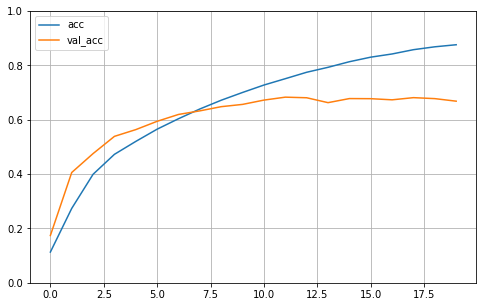

In [ ]:
# 学習曲線を表示する関数
# 引数 history: history, acc_loss: "acc"か"loss"
show_learning_curve(history, 'acc')

In [ ]:
# 役に立ちそうな関数、適宜使ってください

# 各カテゴリーの画像を一つずつ取ってきて表示する関数
# 引数　data_X: 画像データ, data_y: ラベルデータ
def show_sample(data_X, data_y):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        data = [(x, t) for x, t in zip(data_X, data_y) if t == i]
        x, y = data[0]
        plt.subplot(2, 5, i+1)
        plt.title("{}: {}\n{} pic".format(i, class_names[i], len(data)))
        plt.axis("off")
        plt.imshow(x)
# 使用例
# show_sample(_X_train_full, _y_train_full)

# 予測結果20個を画像付きで示す
# 引数 data_X: 画像データ, data_y: ラベルデータ, model: 学習したモデル, shuffle: 予測する画像をランダムにするかどうか
def show_pred(data_X, data_y, model, shuffle=True):
    indices = random.sample(range(data_X.shape[0]), 20) if shuffle else list(range(20))
    X_new = data_X[indices]
    y_new = data_y[indices]
    y_pred = np.argmax(model.predict(X_new), axis=-1)
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(4, 5, i+1)
        color = "green" if y_pred[i] == y_new[i] else "red"
        plt.title("pred: {}\ngold: {}".format(class_names[y_pred[i]], class_names[y_new[i]]),
                  color=color)
        plt.axis("off")
        plt.imshow(X_new[i])
# 使用例
# show_pred(X_test, y_test, model)

# 学習曲線を表示する関数
# 引数 history: history, acc_loss: "acc"か"loss"
def show_learning_curve(history, acc_loss):
    if acc_loss == "acc":
        d = {"acc": history.history["accuracy"], "val_acc": history.history["val_accuracy"]}
    else:
        d = {"loss": history.history["loss"], "val_loss": history.history["val_loss"]}
    pd.DataFrame(d).plot(figsize=(8,5))
    plt.grid(True)
    if acc_loss == "acc":
        plt.gca().set_ylim(0,1) # 縦の範囲を0から1までに
    plt.show()
# 使用例
